# Project 1 - Color identification, color tracking

Finding the center of the ball in a photo. Detecting the center of the red ball in the video

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [15]:
kernel = np.ones((5,5),np.uint8)
cap = cv2.VideoCapture('C:\\Users\\katar\\Documents\\semestr 10\\WMR\\projects\\project1\\movingball.mp4') #path

In [16]:
out = cv2.VideoWriter('out.avi',
                            cv2.VideoWriter_fourcc('M','J','P','G'),
                            10,
                            (neww,newh))

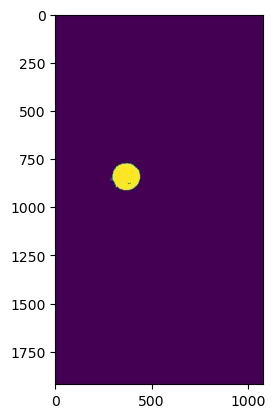

In [17]:
while (cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        hsv_frame = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
        mask0 = cv2.inRange(hsv_frame, np.array([0,50,50]), np.array([3,255,255]))
        mask1 = cv2.inRange(hsv_frame, np.array([170,50,50]), np.array([180,255,255]))
        mask = mask0 + mask1

        res = cv2.bitwise_and(frame, frame, mask=mask)
        mask_without_noise = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
        mask_closed = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
        
        ret,threshold_value = cv2.threshold(mask_closed, 127, 255, 0)
        contours, hierarchy = cv2.findContours(threshold_value, 1, 2)
          
        cnt = contours[0]
        M = cv2.moments(threshold_value)
        center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))
        cv2.circle(frame, center, 10, (255, 0, 0), -1)

        #window size adjustment
        h, w = frame.shape[0:2]
        neww = 800
        newh = int(neww*(h/w))
        frame = cv2.resize(frame, (neww, newh))

        out.write(frame)

        cv2.imshow('moving ball', frame)
        if cv2.waitKey(25)& 0xFF == ord('q'):
            break
    else:
        print("ups")
        break

plt.imshow(mask)
plt.show()
cv2.destroyAllWindows()

In [18]:
image_src = cv2.imread('C:\\Users\\katar\\Documents\\semestr 10\\WMR\\projects\\project1\\ball.png',-1) #path
#plt.imshow(image_src)  plt.show()

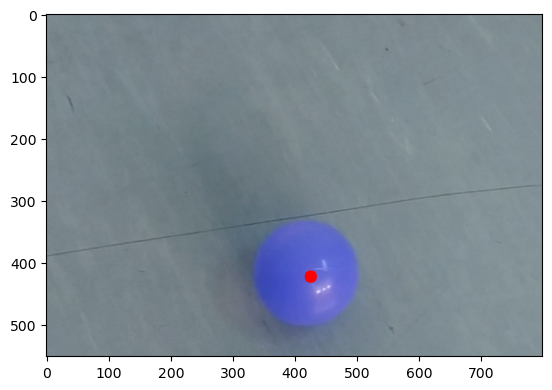

In [19]:

image_hsv = cv2.cvtColor(image_src,cv2.COLOR_BGR2HSV)
mask0 = cv2.inRange(image_hsv, np.array([0,50,50]), np.array([3,255,255]))
mask1 = cv2.inRange(image_hsv, np.array([170,50,50]), np.array([180,255,255]))
mask = mask0 + mask1
res = cv2.bitwise_and(image_src, image_src, mask=mask)
mask_without_noise = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask_closed = cv2.morphologyEx(mask_without_noise,cv2.MORPH_CLOSE, kernel)

ret,threshold_value = cv2.threshold(mask_closed, 127, 255, 0)
contours, hierarchy = cv2.findContours(threshold_value, 1, 2)
          
cnt = contours[0]
M = cv2.moments(threshold_value)
center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))
cv2.circle(image_src, center, 10, (255, 0, 0), -1)

plt.imshow(image_src)
plt.show()